# Lets grow more

# Task -1 Beginner level task: Iris Flowers Classification ML Project

# Task description:

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# DataSet Link: http://archive.ics.uci.edu/ml/datasets/Iris

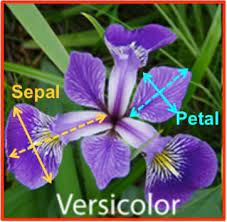

# Importing Packages

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from warnings import filterwarnings
filterwarnings(action='ignore')


In [6]:
# Load the data  and renaming columns
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
df = pd.read_csv('iris.data', names=columns)
print(df)

     Sepal length  Sepal width  Petal length  Petal width    Class_labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
df.head() # show top 5 values

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()   # show bottom 5 values

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
print(df.isnull())    # check for null values

     Sepal length  Sepal width  Petal length  Petal width  Class_labels
0           False        False         False        False         False
1           False        False         False        False         False
2           False        False         False        False         False
3           False        False         False        False         False
4           False        False         False        False         False
..            ...          ...           ...          ...           ...
145         False        False         False        False         False
146         False        False         False        False         False
147         False        False         False        False         False
148         False        False         False        False         False
149         False        False         False        False         False

[150 rows x 5 columns]


In [6]:
print(df.isnull().sum())   # number of missing values

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class_labels    0
dtype: int64


In [7]:
print(df.shape)  # no. of rows and columns

(150, 5)


In [8]:
df.describe()   #describes the statistical details

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df[df.duplicated()]   # check for duplicates

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
df.nunique()   # returns unique elements

Sepal length    35
Sepal width     23
Petal length    43
Petal width     22
Class_labels     3
dtype: int64

In [11]:
df.max()   # returns maximum value

Sepal length               7.9
Sepal width                4.4
Petal length               6.9
Petal width                2.5
Class_labels    Iris-virginica
dtype: object

In [12]:
df.min()  # returns minimun value

Sepal length            4.3
Sepal width             2.0
Petal length            1.0
Petal width             0.1
Class_labels    Iris-setosa
dtype: object

In [13]:
df['Class_labels'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class_labels, dtype: int64

# Data Visualization

# Box plot

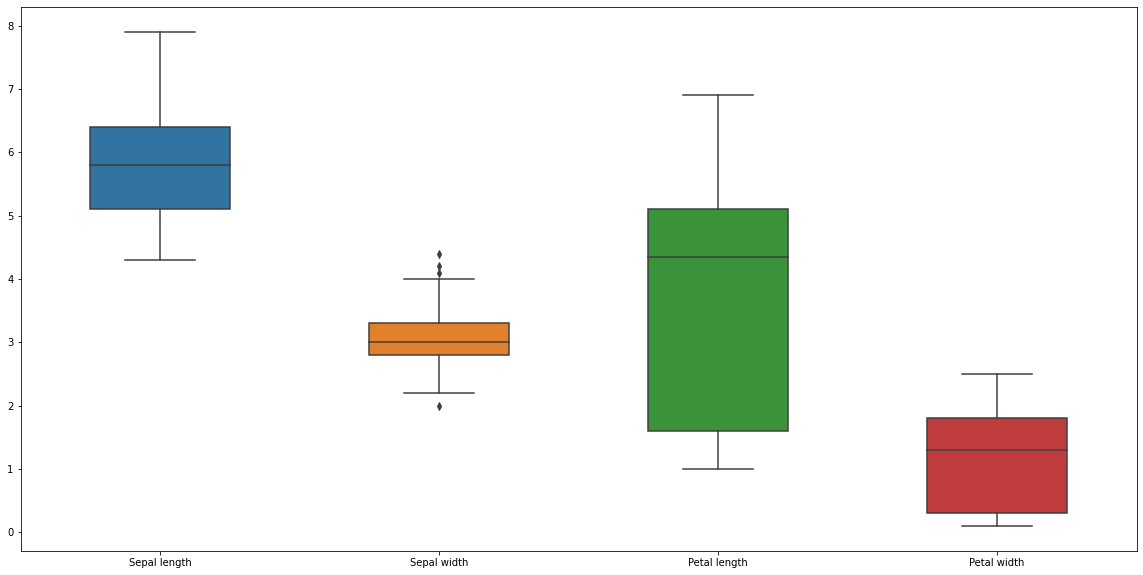

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,width=0.5)
plt.show()

# Violin plot

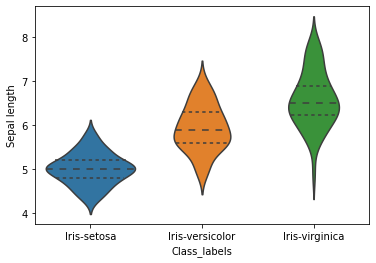

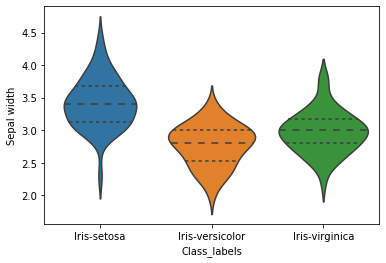

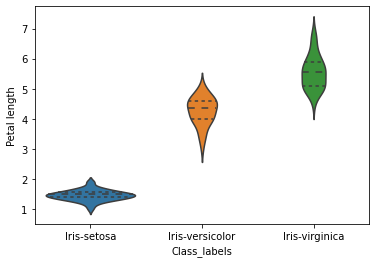

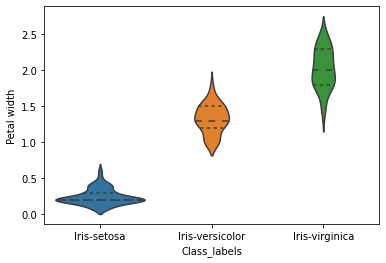

In [15]:
for flowers in df.columns[:4]:
    sns.violinplot(x='Class_labels',y=flowers,data=df,inner='quartile')
    plt.show()

# Pair plot

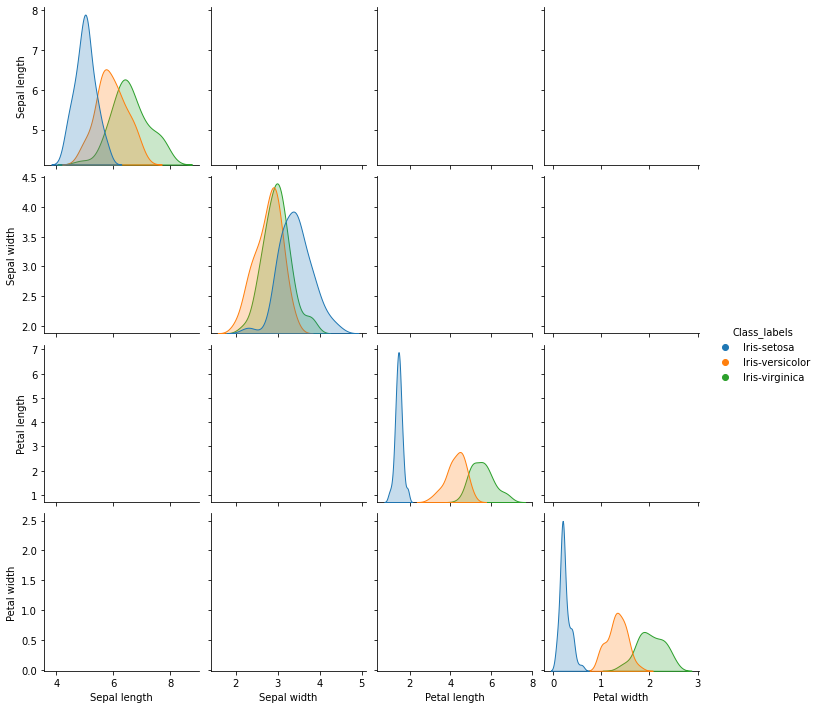

In [16]:
sns.pairplot(df,hue='Class_labels',markers='')
plt.show()

#  Matrix Scatterplot

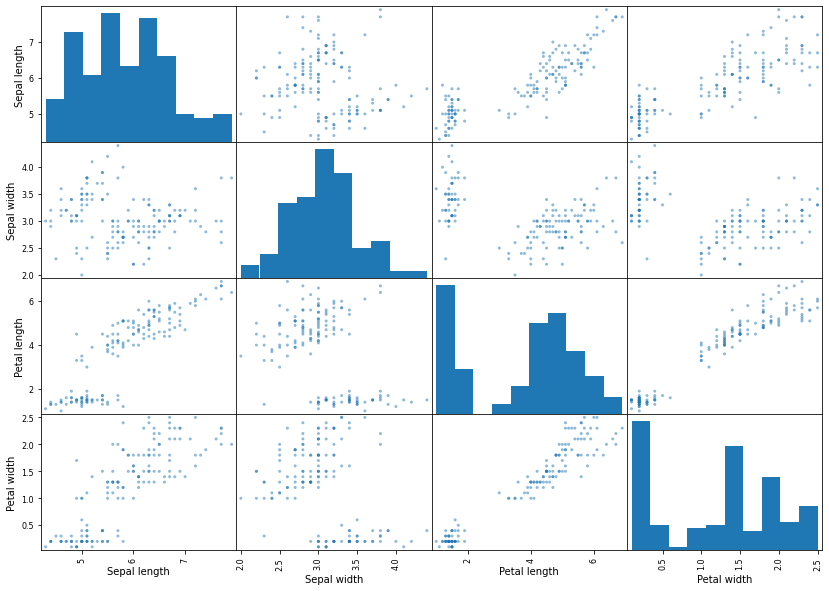

In [17]:

scatter_matrix(df,figsize=(14,10))
plt.show()

# Correlation between different columns

In [18]:
df.corr(method='pearson')

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


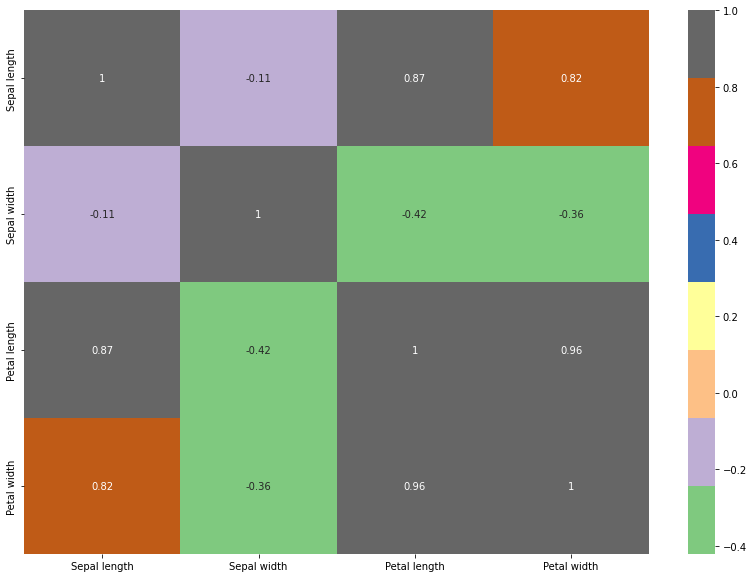

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='Accent')
plt.show()

# Training the model

In [20]:
y=df['Class_labels']
x=df.drop(columns='Class_labels',axis=1)
x.head(),y.head()

(   Sepal length  Sepal width  Petal length  Petal width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: Class_labels, dtype: object)

# Split the data to train and test dataset.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)

# Selecting the models and metrics

In [22]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

# Prediction and performance metrics

In [23]:
# training and evaluating models

models=[lr,knn,svm,nb,dt,rf]
scores=[]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
#     print(scores)
    print("Accuracy of "+type(model).__name__+" is ",np.round(accuracy_score(y_test,y_pred),3))
    
    print("Confusion matrix of "+type(model).__name__+" : ")
    print(confusion_matrix(y_test,y_pred))
    
    print("Classification report of "+type(model).__name__+" : ")
    print(classification_report(y_test,y_pred))
    print("\n")

Accuracy of LogisticRegression is  0.967
Confusion matrix of LogisticRegression : 
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]
Classification report of LogisticRegression : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



Accuracy of KNeighborsClassifier is  0.983
Confusion matrix of KNeighborsClassifier : 
[[19  0  0]
 [ 0 21  0]
 [ 0  1 19]]
Classification report of KNeighborsClassifier : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      1.00      0.98        21
 Iris-virginica       1.00      0.95      0.97        20

       accuracy           

In [24]:
results=pd.DataFrame({
    'Models':['Logistic Regression','K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Tree','Random Forest '],
    'Accuracy':scores})
results=results.sort_values(by='Accuracy',ascending=False)
print(results)

                   Models  Accuracy
1     K-Nearest Neighbors  0.983333
2  Support Vector Machine  0.983333
0     Logistic Regression  0.966667
4           Decision Tree  0.966667
5          Random Forest   0.966667
3             Naive Bayes  0.950000
